**Context**


The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

Data source: http://worldhappiness.report/ed/2019/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
%matplotlib inline
rcParams["figure.figsize"]=12,6
sns.set_style("whitegrid")

In [2]:
world_happiness = pd.read_csv("/content/world-happiness-report-2019.csv")
df = world_happiness.copy()

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
#renaming the columns in a easy way
df.rename(columns={"Country (region)":"Country"},inplace=True)
df.rename(columns={"Log of GDP\nper capita":"GDP"},inplace=True)
df.rename(columns={"Healthy life\nexpectancy":"Healthy life"},inplace=True)

In [5]:
#how many data is present here?
print(df.shape)
print("Records/Rows present in a dataframe:{}".format(df.shape[0]))
print("Features/Columns present in a dataframe:{}".format(df.shape[1]))

(156, 11)
Records/Rows present in a dataframe:156
Features/Columns present in a dataframe:11


In [6]:
#lets change the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          156 non-null    object 
 1   Ladder           156 non-null    int64  
 2   SD of Ladder     156 non-null    int64  
 3   Positive affect  155 non-null    float64
 4   Negative affect  155 non-null    float64
 5   Social support   155 non-null    float64
 6   Freedom          155 non-null    float64
 7   Corruption       148 non-null    float64
 8   Generosity       155 non-null    float64
 9   GDP              152 non-null    float64
 10  Healthy life     150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [7]:
#lets check the missing values percentage in colmuns wise
missing_values=df.isnull().sum().sort_values(ascending=False)/len(df)*100
missing_values=missing_values[missing_values !=0]
print(missing_values)
print("_"*60)

Corruption         5.128205
Healthy life       3.846154
GDP                2.564103
Positive affect    0.641026
Negative affect    0.641026
Social support     0.641026
Freedom            0.641026
Generosity         0.641026
dtype: float64
____________________________________________________________


from indication 8 features has a missing values and Corrution has the most number of missing values.

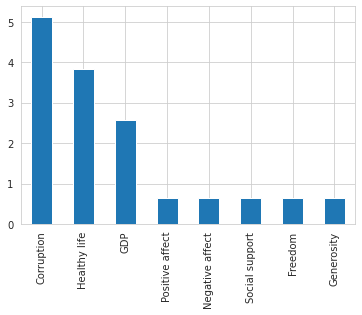

In [8]:
missing_values.plot(kind="bar")

In [9]:
#checking the columns header
print(df.columns)

Index(['Country', 'Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'GDP', 'Healthy life'],
      dtype='object')


In [10]:
#what are the various features available in a dataset?
df.dtypes
#1 features is string or float object
#2 features is int64 and rest of them are float type.

Country             object
Ladder               int64
SD of Ladder         int64
Positive affect    float64
Negative affect    float64
Social support     float64
Freedom            float64
Corruption         float64
Generosity         float64
GDP                float64
Healthy life       float64
dtype: object

In [11]:
#which features are numeric data?
num_df=df.select_dtypes(include=["float","int"]).copy()
print("number of numeric features {}".format(len(num_df.columns)))
num_df.head()

number of numeric features 10


,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,GDP,Healthy life
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [12]:
#which features are caterogical data?
cat_df=df.select_dtypes(include=["object"]).copy()
print("number of categorical features:{}".format(len(cat_df.columns)))
cat_df.head()

number of categorical features:1


,Country
0,Finland
1,Denmark
2,Norway
3,Iceland
4,Netherlands


**Basic Descriptive statistics on numeric features**

In [13]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,GDP,Healthy life
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


Obesrvations:

1.Developed and developing country is in same dataset.so,the data has very high mean and std.

2.Minimum from 1 to Maximum till 156

3.Most of the Average is 78

**Exploratory Data Analysis**

**1.Univariate:numerical Features**

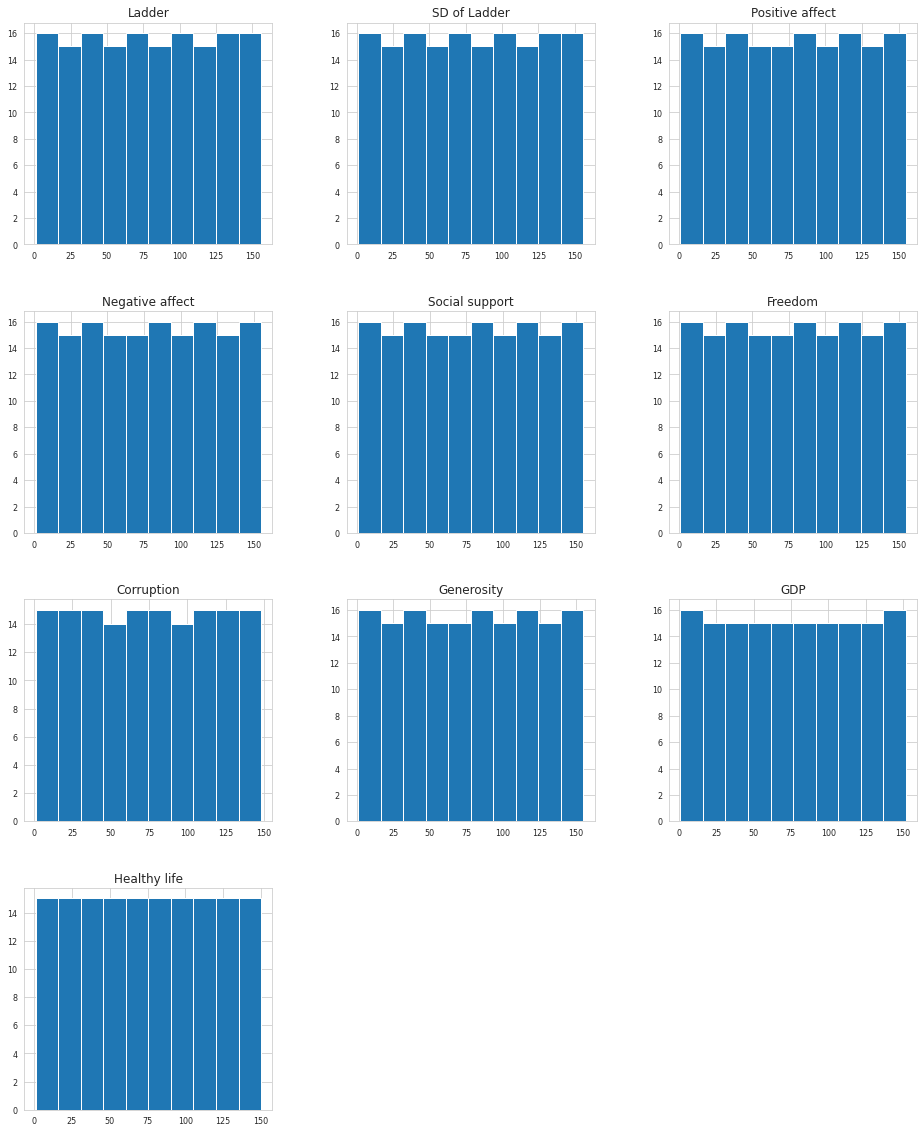

In [14]:
#lets see the distribution of numerical Features
num_df.hist(figsize=(16,20),xlabelsize=8,ylabelsize=8);

In [15]:
#checking skewedness 
print("Skewedness of a numerical features")
print("_"*60)
print(num_df.skew())

Skewedness of a numerical features
____________________________________________________________
Ladder             0.0
SD of Ladder       0.0
Positive affect    0.0
Negative affect    0.0
Social support     0.0
Freedom            0.0
Corruption         0.0
Generosity         0.0
GDP                0.0
Healthy life       0.0
dtype: float64


Univariate: Categorical Features

In [24]:
def UVA_Categorical(data,cat): #parameter here are df and cat_df
  plt.figure(figsize=(10,6))  #plot fig size
  sns.countplot(cat,data=data)    #features of seaborn plot
  plt.xlabel(cat,fontsize=14,fontweight="bold") #x_axis label
  plt.ylabel("Count",fontsize=14,fontweight="bold")  #y_axis label
  plt.title("Value Count:\n{}".format(df[cat].value_counts(normalize=True))) #title of the graph normalize

  #Rotating xtickslabels
  if len(data[cat].value_counts())>7:
      x = plt.gca().xaxis
      for item in x.get_ticklabels():
          item.set_rotation(90)
  plt.show()

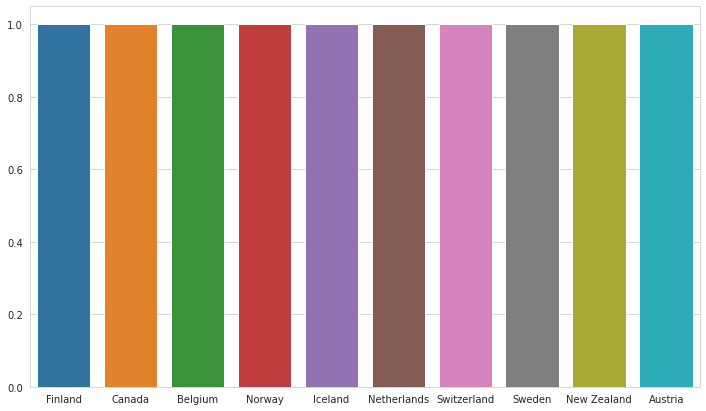

In [102]:
plt.figure(figsize=(12,7))
sns.barplot(data=df,x=df.Country.value_counts().sort_values(ascending=False).index[:10],
            y=df.Country.value_counts().sort_values(ascending=False).values[:10])


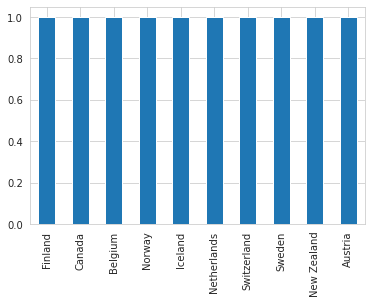

In [104]:
country_data=df.Country.value_counts().sort_values(ascending=False)[:10]
country_data.plot(kind="bar")

In [22]:
df["Country"].value_counts().sum()

156

In [29]:
df.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,GDP,Healthy life
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


lets see the relationship between Corruption and GDP columns

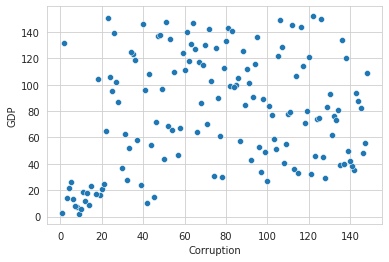

In [31]:
sns.scatterplot(data=df,x="Corruption",y="GDP")

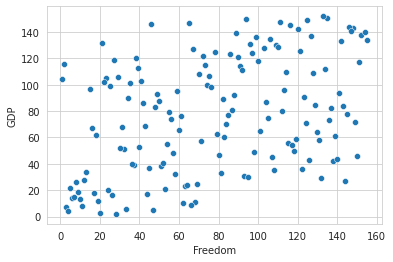

In [32]:
#relationship between freedom and GDP
sns.scatterplot(data=df,x="Freedom",y="GDP")

In [45]:
df["Country"].groupby(df["GDP"]).sum().value_counts(ascending=False)

Qatar                       1
Vietnam                     1
Morocco                     1
Guatemala                   1
El Salvador                 1
                           ..
Uruguay                     1
Mauritius                   1
Iran                        1
Argentina                   1
Central African Republic    1
Name: Country, Length: 152, dtype: int64

#Relationship between Negative effect and GDP

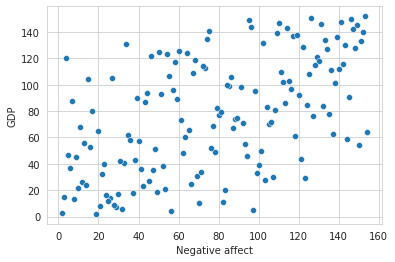

In [49]:
sns.scatterplot(data=df,x="Negative affect",y="GDP")

**Bivariate Analysis**

In [17]:
#1.Numerical Variables

In [50]:
#Correlation matrix using Pearson and Spearman correlation of numerical features
num_df.corr(method="pearson")

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,GDP,Healthy life
Ladder,1.000000,0.539362,0.491432,0.523643,0.817842,0.546777,0.190071,0.497856,0.813367,0.816740
SD of Ladder,0.539362,1.000000,0.085381,0.619267,0.599464,0.251856,0.258639,0.392154,0.629662,0.611376
Positive affect,0.491432,0.085381,1.000000,0.389697,0.386269,0.681770,0.209659,0.354877,0.304522,0.332839
Negative affect,0.523643,0.619267,0.389697,1.000000,0.621888,0.430241,0.158903,0.338226,0.542143,0.488649
Social support,0.817842,0.599464,0.386269,0.621888,1.000000,0.448903,0.118434,0.442432,0.772912,0.740728
Freedom,0.546777,0.251856,0.681770,0.430241,0.448903,1.000000,0.381304,0.489991,0.409501,0.416263
Corruption,0.190071,0.258639,0.209659,0.158903,0.118434,0.381304,1.000000,0.266138,0.198581,0.123132
Generosity,0.497856,0.392154,0.354877,0.338226,0.442432,0.489991,0.266138,1.000000,0.478739,0.431620
GDP,0.813367,0.629662,0.304522,0.542143,0.772912,0.409501,0.198581,0.478739,1.000000,0.847580
Healthy life,0.816740,0.611376,0.332839,0.488649,0.740728,0.416263,0.123132,0.431620,0.847580,1.000000


In [51]:
#spearman's correlation rank
num_df.corr(method="spearman")

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,GDP,Healthy life
Ladder,1.000000,0.539362,0.490725,0.523415,0.818095,0.546170,0.183322,0.496835,0.813175,0.816721
SD of Ladder,0.539362,1.000000,0.086758,0.619700,0.600603,0.252931,0.262841,0.392920,0.628620,0.609305
Positive affect,0.490725,0.086758,1.000000,0.389697,0.386269,0.681770,0.209175,0.354877,0.305312,0.332048
Negative affect,0.523415,0.619700,0.389697,1.000000,0.621888,0.430241,0.160470,0.338226,0.542977,0.488953
Social support,0.818095,0.600603,0.386269,0.621888,1.000000,0.448903,0.118929,0.442432,0.772680,0.740279
Freedom,0.546170,0.252931,0.681770,0.430241,0.448903,1.000000,0.378212,0.489991,0.408801,0.416601
Corruption,0.183322,0.262841,0.209175,0.160470,0.118929,0.378212,1.000000,0.263163,0.187730,0.118324
Generosity,0.496835,0.392920,0.354877,0.338226,0.442432,0.489991,0.263163,1.000000,0.478226,0.428714
GDP,0.813175,0.628620,0.305312,0.542977,0.772680,0.408801,0.187730,0.478226,1.000000,0.847366
Healthy life,0.816721,0.609305,0.332048,0.488953,0.740279,0.416601,0.118324,0.428714,0.847366,1.000000


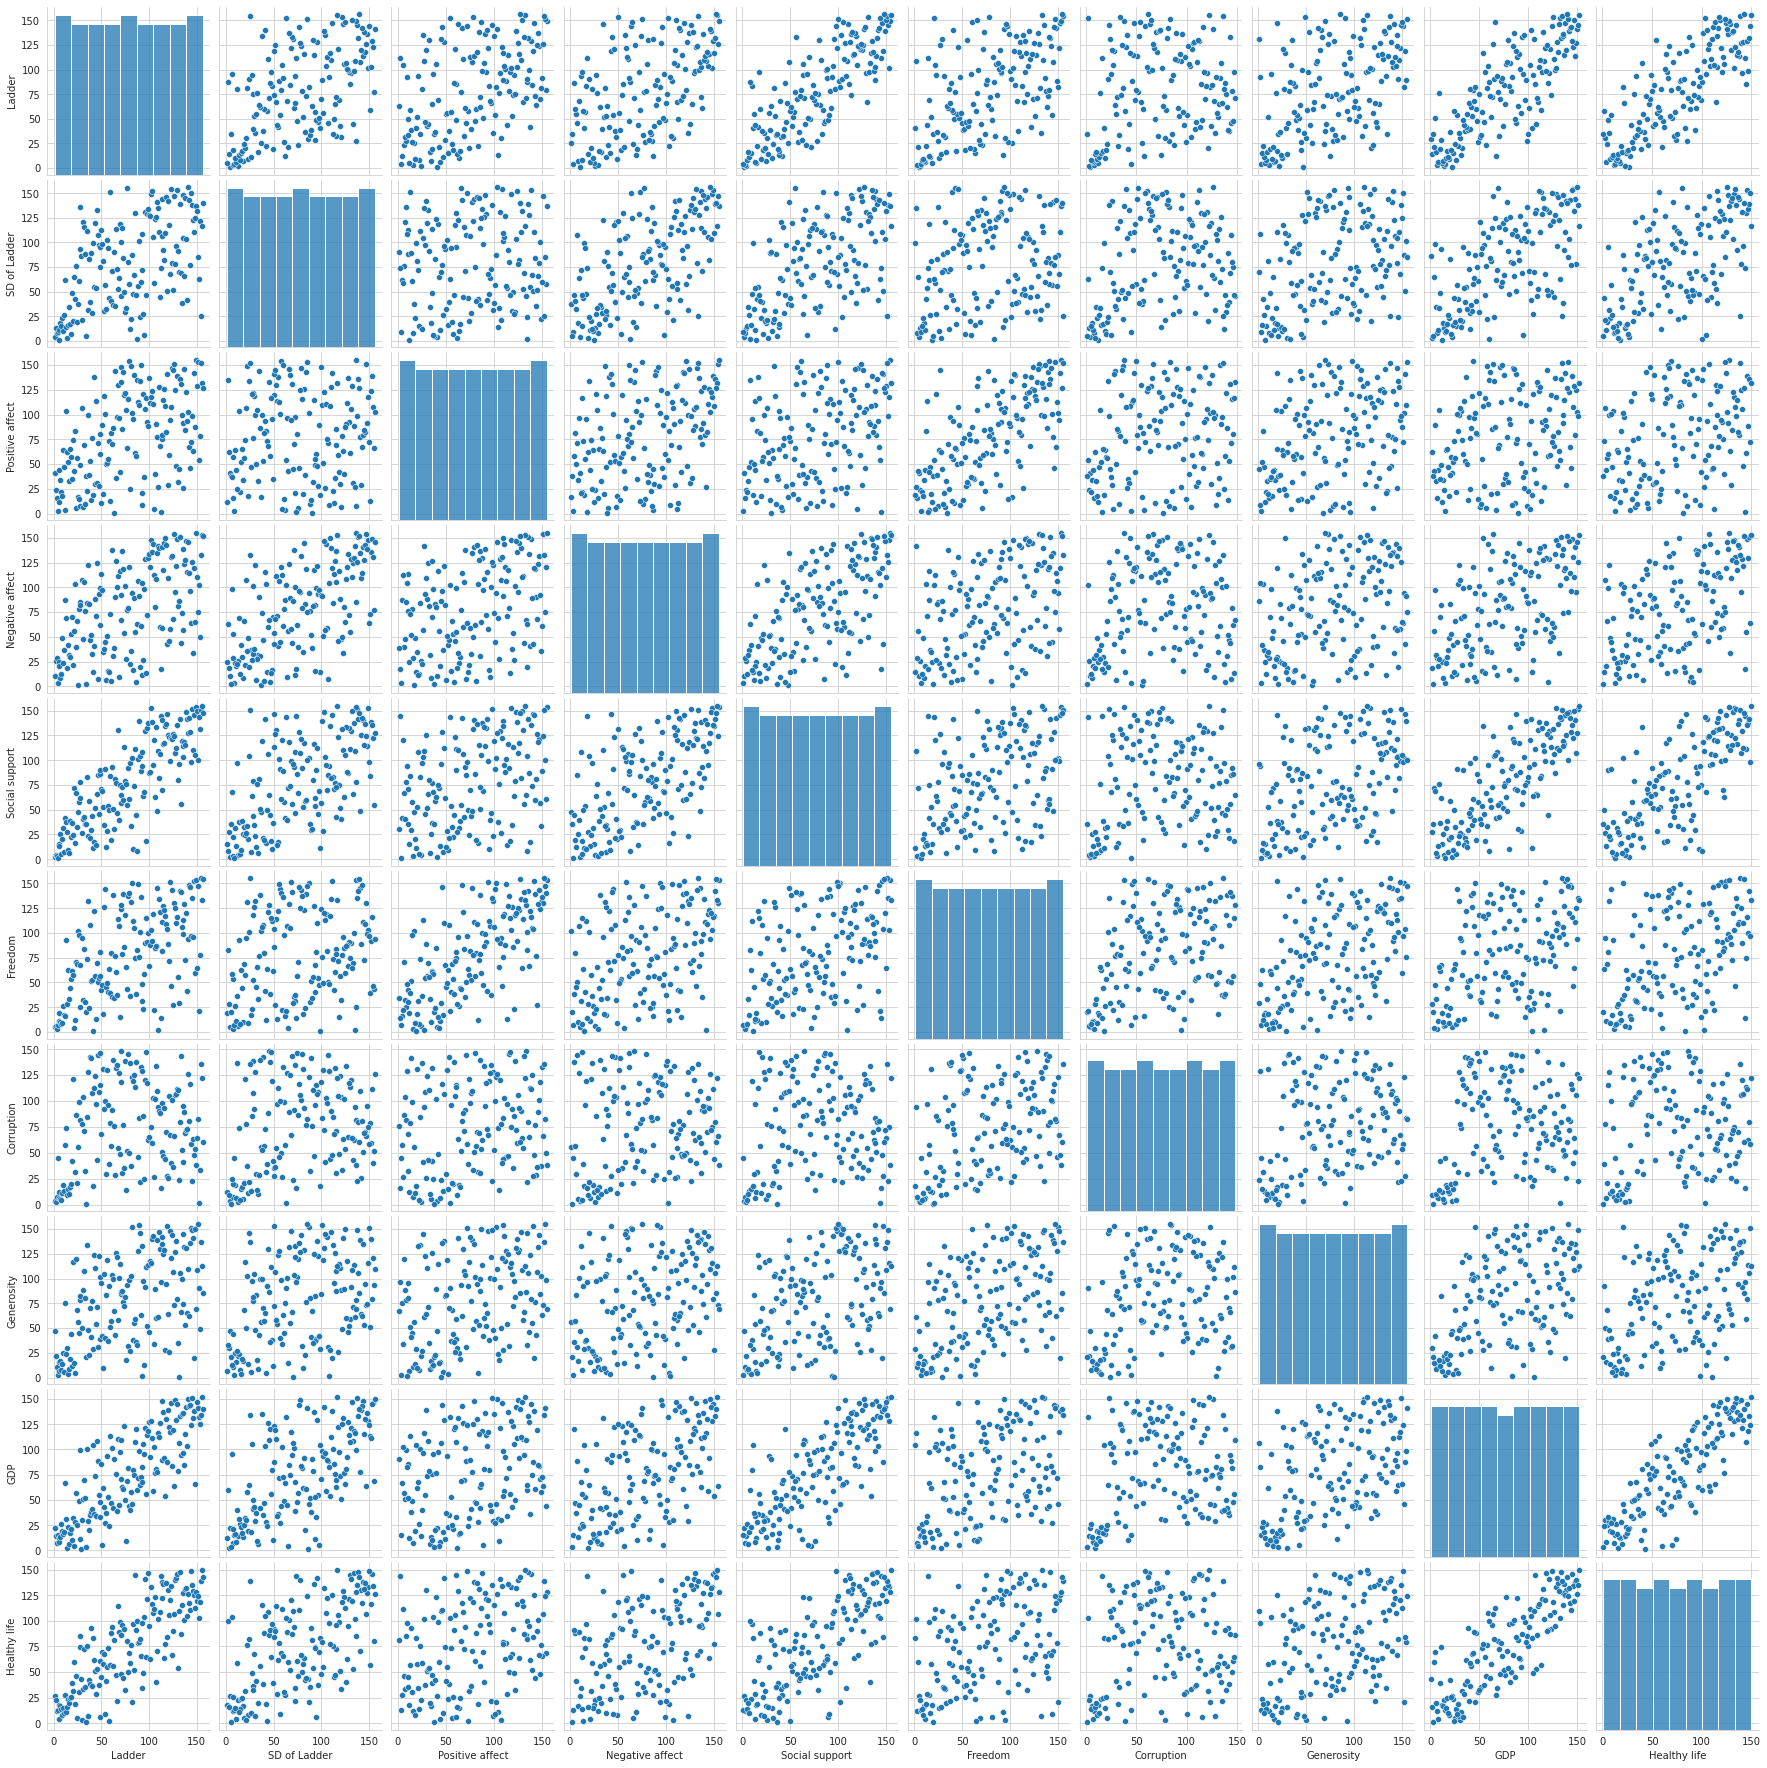

In [52]:
sns.pairplot(num_df)

Text(0.5, 1.0, 'Corelation between different attributes')

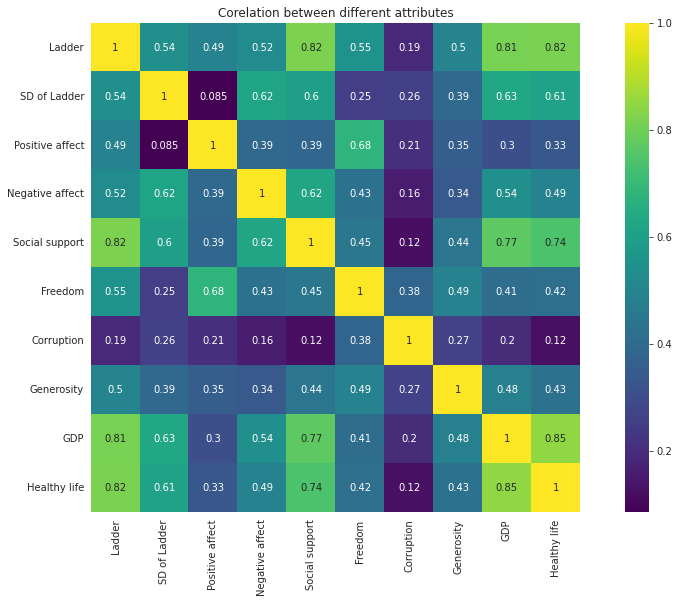

In [53]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),vmax= 1,square=True,annot=True,cmap="viridis")
plt.title("Corelation between different attributes")

Observations:

1. when the country has good gdp the people has a healthy life and has good social support.
2. when the country has high corruption rate the people will suffer for gdp and heathy life

In [54]:
df.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,GDP,Healthy life
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


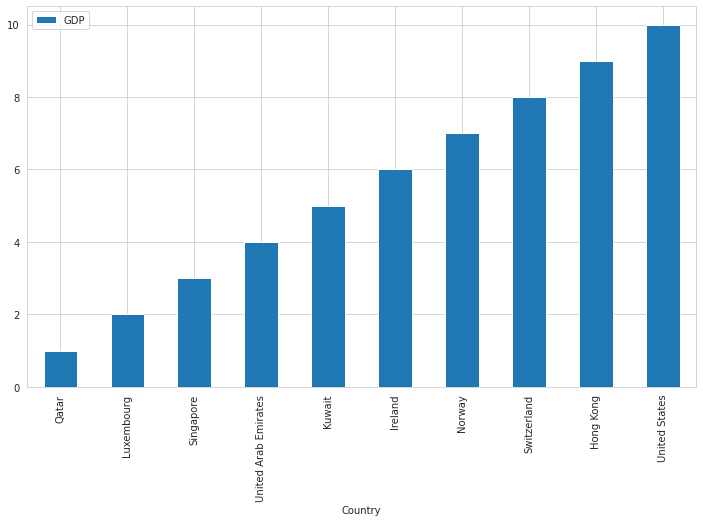

In [67]:
#which country has highest gdp
gdp_impact = df.pivot_table(index="Country",values="GDP",aggfunc=np.median).sort_values(by="GDP").head(10)
gdp_impact.plot(kind="bar",figsize=(12,7))
plt.show()

United States,Hong Kong and switzerland has the highest GDP

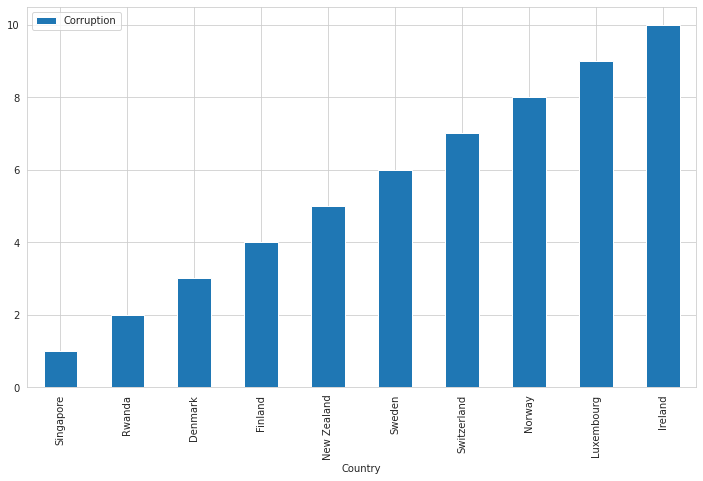

In [71]:
#which country has least corruption
corruption_effect = df.pivot_table(index="Country",values="Corruption",aggfunc=np.median).sort_values(by="Corruption",ascending=True).head(10)
corruption_effect.plot(kind="bar",figsize=(12,7))
plt.show()

Ireland,luxembourg and norway has the lowest corruption rate

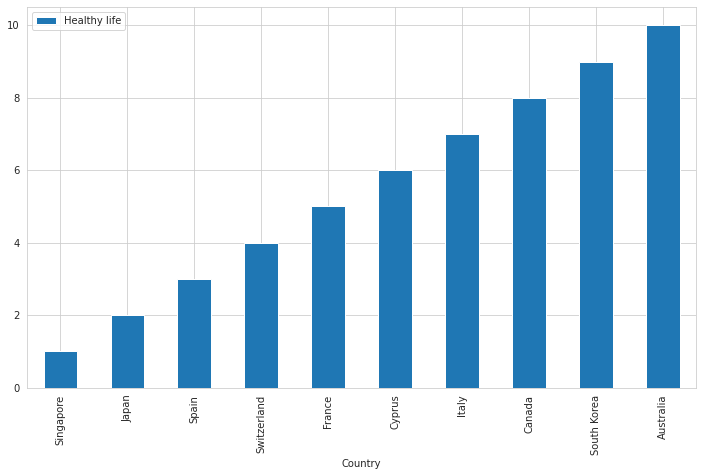

In [75]:
#which country has the most healthy life
good_health_life= df.pivot_table(index="Country",values="Healthy life",aggfunc=np.median).sort_values(by="Healthy life",ascending=True).head(10)
good_health_life.plot(kind="bar",figsize=(12,7))
plt.show()

Australia,South Korea and Canada has the highest healthy life

In [76]:
df.isnull().sum()

Country            0
Ladder             0
SD of Ladder       0
Positive affect    1
Negative affect    1
Social support     1
Freedom            1
Corruption         8
Generosity         1
GDP                4
Healthy life       6
dtype: int64

In [79]:
df["Healthy life"].describe()

count    150.000000
mean      75.500000
std       43.445368
min        1.000000
25%       38.250000
50%       75.500000
75%      112.750000
max      150.000000
Name: Healthy life, dtype: float64

In [80]:
df["Corruption"].describe() 

count    148.000000
mean      74.500000
std       42.868014
min        1.000000
25%       37.750000
50%       74.500000
75%      111.250000
max      148.000000
Name: Corruption, dtype: float64

In [81]:
df.tail(10)

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,GDP,Healthy life
146,Haiti,147,111,142.0,119.0,146.0,152.0,48.0,20.0,138.0,125.0
147,Botswana,148,125,87.0,65.0,105.0,60.0,54.0,150.0,66.0,113.0
148,Syria,149,137,155.0,155.0,154.0,153.0,38.0,69.0,NaN,128.0
149,Malawi,150,132,129.0,110.0,150.0,65.0,64.0,109.0,147.0,119.0
150,Yemen,151,85,153.0,75.0,100.0,147.0,83.0,155.0,141.0,124.0
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0
155,South Sudan,156,140,127.0,152.0,148.0,154.0,61.0,85.0,140.0,143.0


As all the rows lies according to the rank. so it is good practice to fill all missing values using front fill(FFILL) or back fill(bfill).

In [83]:
data=df.fillna(method="ffill")

In [85]:
data.isnull().sum()

Country            0
Ladder             0
SD of Ladder       0
Positive affect    0
Negative affect    0
Social support     0
Freedom            0
Corruption         0
Generosity         0
GDP                0
Healthy life       0
dtype: int64

In [86]:
data["Healthy life"].describe()

count    156.000000
mean      75.083333
std       43.319661
min        1.000000
25%       37.750000
50%       75.500000
75%      112.250000
max      150.000000
Name: Healthy life, dtype: float64

In [87]:
data["Corruption"].describe()

count    156.000000
mean      75.891026
std       42.661998
min        1.000000
25%       39.750000
50%       76.500000
75%      113.250000
max      148.000000
Name: Corruption, dtype: float64